# Fitting evolutionary tracks

In this tutorial, we will fit the bolometric luminosity and age of [HD 135344 Ab](https://voparis-exoplanet-new.obspm.fr/catalog/hd_135344_ab--11115/) with cooling tracks from an evolutionary model to infer the planetary mass.

In [1]:
import os
os.environ['DYLD_LIBRARY_PATH'] = '/Users/tomasstolker/applications/MultiNest/lib'

In [2]:
import matplotlib.pyplot as plt
import numpy as np

In [3]:
from species import SpeciesInit
from species.data.database import Database
from species.fit.fit_evolution import FitEvolution
from species.read.read_isochrone import ReadIsochrone
from species.plot.plot_mcmc import plot_posterior
from species.plot.plot_evolution import plot_cooling, plot_isochrones

In [4]:
SpeciesInit()

species

Version: 0.10.3.dev0
Working folder: /Users/tomasstolker/applications/species/docs/tutorials

Creating species_config.ini... [DONE]
Creating species_database.hdf5... [DONE]
Creating data folder... [DONE]

Configuration settings:
   - Database: species_database.hdf5
   - Data folder: data
   - Magnitude of Vega: 0.03

Multiprocessing: mpi4py installed
Process number 1 out of 1...


In [5]:
database = Database()
database.add_isochrones('atmo')


------------------
Add isochrone grid
------------------

Evolutionary model: atmo
File name: None
Database tag: None



100%|█████████████████████████████████████| 9.98M/9.98M [00:00<00:00, 4.71GB/s]


Unpacking ATMO isochrones (9.6 MB)...

 [DONE]
Adding isochrones: ATMO equilibrium chemistry... [DONE]
Database tag: atmo-ceq
Adding isochrones: ATMO weak non-equilibrium chemistry... [DONE]
Database tag: atmo-neq-weak
Adding isochrones: ATMO strong non-equilibrium chemistry... [DONE]
Database tag: atmo-neq-strong


In [6]:
fit_evol = FitEvolution(evolution_model='atmo-ceq',
                        log_lum=(-3.9, 0.1),
                        age_prior=(11.9, -5.8, 3.7),
                        mass_prior=None,
                        radius_prior=None,
                        bounds={'age': (1., 50.), 'mass_0': (1.0, 50.)},
                        interp_method='linear')


----------------------
Fit evolutionary model
----------------------

Evolution model: atmo-ceq
Luminosity log(L/Lsun): (-3.9, 0.1)

Fitting 2 parameters:
   - age
   - mass_0

Uniform priors (min, max):
   - age = (1.0, 50.0)
   - mass_0 = (1.0, 50.0)

Normal priors (mean, sigma):
   - Age (Myr): (11.9, -5.8, 3.7)
   - Mass (Mjup): [None]
   - Radius (Rjup): [None]


In [7]:
fit_evol.run_multinest(tag='hd135344ab',
                       n_live_points=1000,
                       output='./multinest/')


------------------------------
Nested sampling with MultiNest
------------------------------

Database tag: hd135344ab
Number of live points: 1000
Output folder: ./multinest/

 *****************************************************
 MultiNest v3.10
 Copyright Farhan Feroz & Mike Hobson
 Release Jul 2015

 no. of live points = 1000
 dimensionality =    2
 *****************************************************
 ln(ev)=  -1.7589546819843822      +/-   5.1711112237214710E-002
 Total Likelihood Evaluations:         7139
 Sampling finished. Exiting MultiNest

Nested sampling global log-evidence: -1.76 +/- 0.05
Nested importance sampling global log-evidence: -1.69 +/- 0.03

Sample with the maximum likelihood:
   - Log-likelihood = 1.38
   - age = 11.75
   - mass_0 = 9.88

Extracting the posteriors of Teff, R, and log(g):


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/2750 [00:00<?, ?it/s]


---------------------
Add posterior samples
---------------------

Database tag: hd135344ab
Sampler: multinest
Samples shape: (2750, 5)
ln(Z) = -1.69 +/- 0.03



---------------------
Get posterior samples
---------------------

Database tag: hd135344ab
Random samples: None
Samples shape: (2719, 5)

Parameters:
   - age
   - mass_0
   - teff_0
   - radius_0
   - logg_0

Uniform priors (min, max):
   - age = (1.0, 50.0)
   - mass_0 = (1.0, 50.0)

----------------------------
Plot posterior distributions
----------------------------

Database tag: hd135344ab
Object type: planet
Manual parameters: None

Model type: evolution
Model name: atmo-ceq
Sampler: multinest

Median parameters:
   - age = 12.04
   - mass_0 = 9.86
   - teff_0 = 1585.37
   - radius_0 = 1.45
   - logg_0 = 4.07

Sample with the maximum likelihood:
   - age = 15.20
   - mass_0 = 11.07
   - teff_0 = 1604.71
   - radius_0 = 1.42
   - logg_0 = 4.14

Parameters included in corner plot:
   - age
   - mass
   - teff
   - radius
   - logg


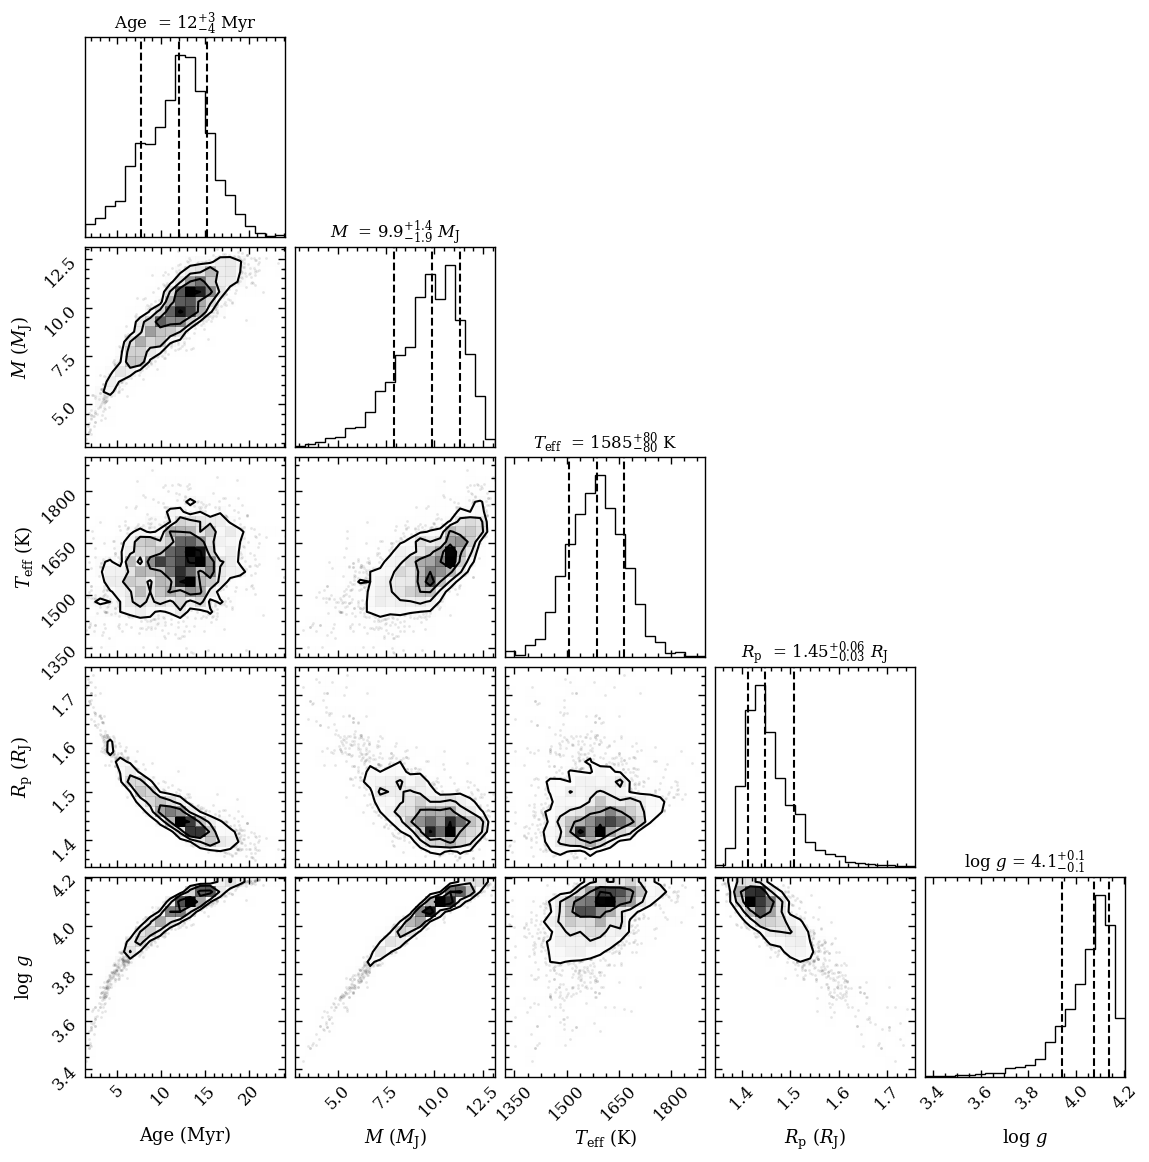

In [8]:
fig = plot_posterior(tag='hd135344ab',
                     offset=(-0.25, -0.25),
                     title_fmt=['.0f', '.1f', '.0f', '.2f', '.1f'],
                     output=None)

In [8]:
best = database.get_probable_sample('hd135344ab')


--------------------------------------
Get sample with the maximum likelihood
--------------------------------------

Database tag: hd135344ab

Parameters:
   - age = 11.75
   - mass_0 = 9.88
   - teff_0 = 1587.66
   - radius_0 = 1.45
   - logg_0 = 4.07


In [9]:
read_iso = ReadIsochrone(tag='atmo-ceq')
best_iso = read_iso.get_isochrone(age=best['age'], masses=np.linspace(0.5, 30., 100))
best_cool = read_iso.get_cooling_track(mass=best['mass_0'], ages=np.linspace(0.5, 30., 100))


-------------------
Read isochrone grid
-------------------

Database tag: atmo-ceq
Create regular grid: False

Setting 'extra_param' attribute: None



-------------------
Plot cooling tracks
-------------------

Database tag: hd135344ab
Number of samples: 50
Model parameters: luminosity

---------------------
Get posterior samples
---------------------

Database tag: hd135344ab
Random samples: None
Samples shape: (2719, 5)

Parameters:
   - age
   - mass_0
   - teff_0
   - radius_0
   - logg_0

Uniform priors (min, max):
   - age = (1.0, 50.0)
   - mass_0 = (1.0, 50.0)

-------------------
Read isochrone grid
-------------------

Database tag: atmo-ceq
Create regular grid: False

Setting 'extra_param' attribute: None


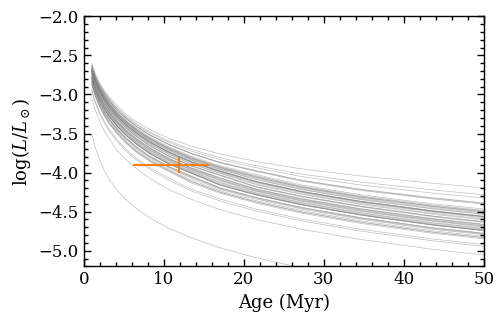

In [11]:
fig, samples_1, indices = plot_cooling(tag='hd135344ab',
                                       n_samples=50,
                                       cooling_param='luminosity',
                                       xlim=(0., 50.),
                                       ylim=(-5.2, -2.),
                                       figsize=(4., 2.5),
                                       output=None)


-------------------
Plot cooling tracks
-------------------

Database tag: hd135344ab
Number of samples: 50
Model parameters: radius

---------------------
Get posterior samples
---------------------

Database tag: hd135344ab
Random samples: None
Samples shape: (2719, 5)

Parameters:
   - age
   - mass_0
   - teff_0
   - radius_0
   - logg_0

Uniform priors (min, max):
   - age = (1.0, 50.0)
   - mass_0 = (1.0, 50.0)

-------------------
Read isochrone grid
-------------------

Database tag: atmo-ceq
Create regular grid: False

Setting 'extra_param' attribute: None


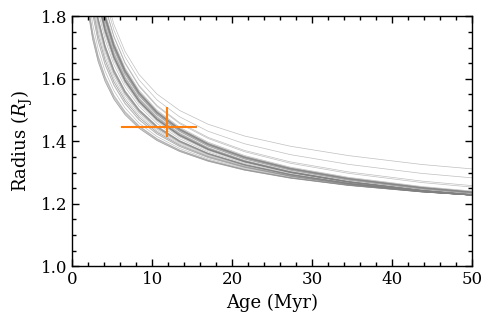

In [12]:
fig, samples_2, indices = plot_cooling(tag='hd135344ab',
                                       n_samples=50,
                                       cooling_param='radius',
                                       xlim=(0., 50.),
                                       ylim=(1.0, 1.8),
                                       figsize=(4., 2.5),
                                       output=None)


-------------------
Plot cooling tracks
-------------------

Database tag: hd135344ab
Number of samples: 50
Model parameters: teff

---------------------
Get posterior samples
---------------------

Database tag: hd135344ab
Random samples: None
Samples shape: (2719, 5)

Parameters:
   - age
   - mass_0
   - teff_0
   - radius_0
   - logg_0

Uniform priors (min, max):
   - age = (1.0, 50.0)
   - mass_0 = (1.0, 50.0)

-------------------
Read isochrone grid
-------------------

Database tag: atmo-ceq
Create regular grid: False

Setting 'extra_param' attribute: None


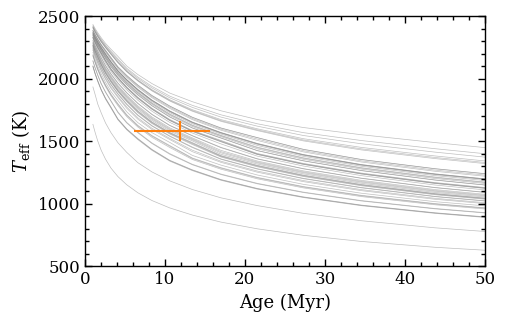

In [13]:
fig, samples_4, indices = plot_cooling(tag='hd135344ab',
                                       n_samples=50,
                                       cooling_param='teff',
                                       xlim=(0., 50.),
                                       ylim=(500.0, 2500.),
                                       figsize=(4., 2.5),
                                       output=None)


-------------------
Plot cooling tracks
-------------------

Database tag: hd135344ab
Number of samples: 50
Model parameters: logg

---------------------
Get posterior samples
---------------------

Database tag: hd135344ab
Random samples: None
Samples shape: (2719, 5)

Parameters:
   - age
   - mass_0
   - teff_0
   - radius_0
   - logg_0

Uniform priors (min, max):
   - age = (1.0, 50.0)
   - mass_0 = (1.0, 50.0)

-------------------
Read isochrone grid
-------------------

Database tag: atmo-ceq
Create regular grid: False

Setting 'extra_param' attribute: None


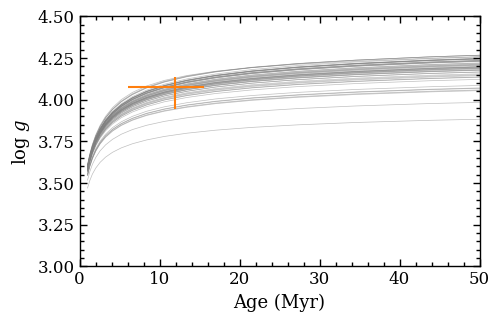

In [14]:
fig, samples_4, indices = plot_cooling(tag='hd135344ab',
                                       n_samples=50,
                                       cooling_param='logg',
                                       xlim=(0., 50.),
                                       ylim=(3.0, 4.5),
                                       figsize=(4., 2.5),
                                       output=None)


---------------
Plot isochrones
---------------

Database tag: hd135344ab
Number of samples: 50

---------------------
Get posterior samples
---------------------

Database tag: hd135344ab
Random samples: None
Samples shape: (2719, 5)

Parameters:
   - age
   - mass_0
   - teff_0
   - radius_0
   - logg_0

Uniform priors (min, max):
   - age = (1.0, 50.0)
   - mass_0 = (1.0, 50.0)

-------------------
Read isochrone grid
-------------------

Database tag: atmo-ceq
Create regular grid: False

Setting 'extra_param' attribute: None

Output: None


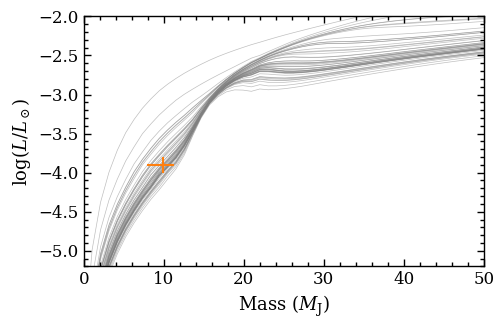

In [15]:
fig, samples_3, indices = plot_isochrones(tag='hd135344ab',
                                          n_samples=50,
                                          xlim=(0., 50.),
                                          ylim=(-5.2, -2.),
                                          figsize=(4., 2.5),
                                          output=None)